### Selenium image screenshot

Install Pillow 
- 이미지를 컨트롤 하기위한 python 패키지인 Pillow를 설치합니다.
- `pip3 install pillow`
- http://pillow.readthedocs.io/en/3.1.x/reference/Image.html

Windows
- 4.1 버전은 주피터 노트북에서 사용시 에러 발생
- `$ conda uninstall pillow`
- `$ conda install -c ananconda pillow==4.0.0`

In [1]:
import time
from selenium import webdriver
from PIL import Image as pil

In [2]:
# 브라우져를 열고 youtube 페이지로 이동하여 브라우져 화면을 이미지로 저장합니다. 
driver =  webdriver.Chrome()
driver.get("https://www.youtube.com/watch?v=tXOJIBPwSyo&t=200s")
time.sleep(1)
driver.save_screenshot('screenshot.png')

True

##### show image

(2400, 1958)


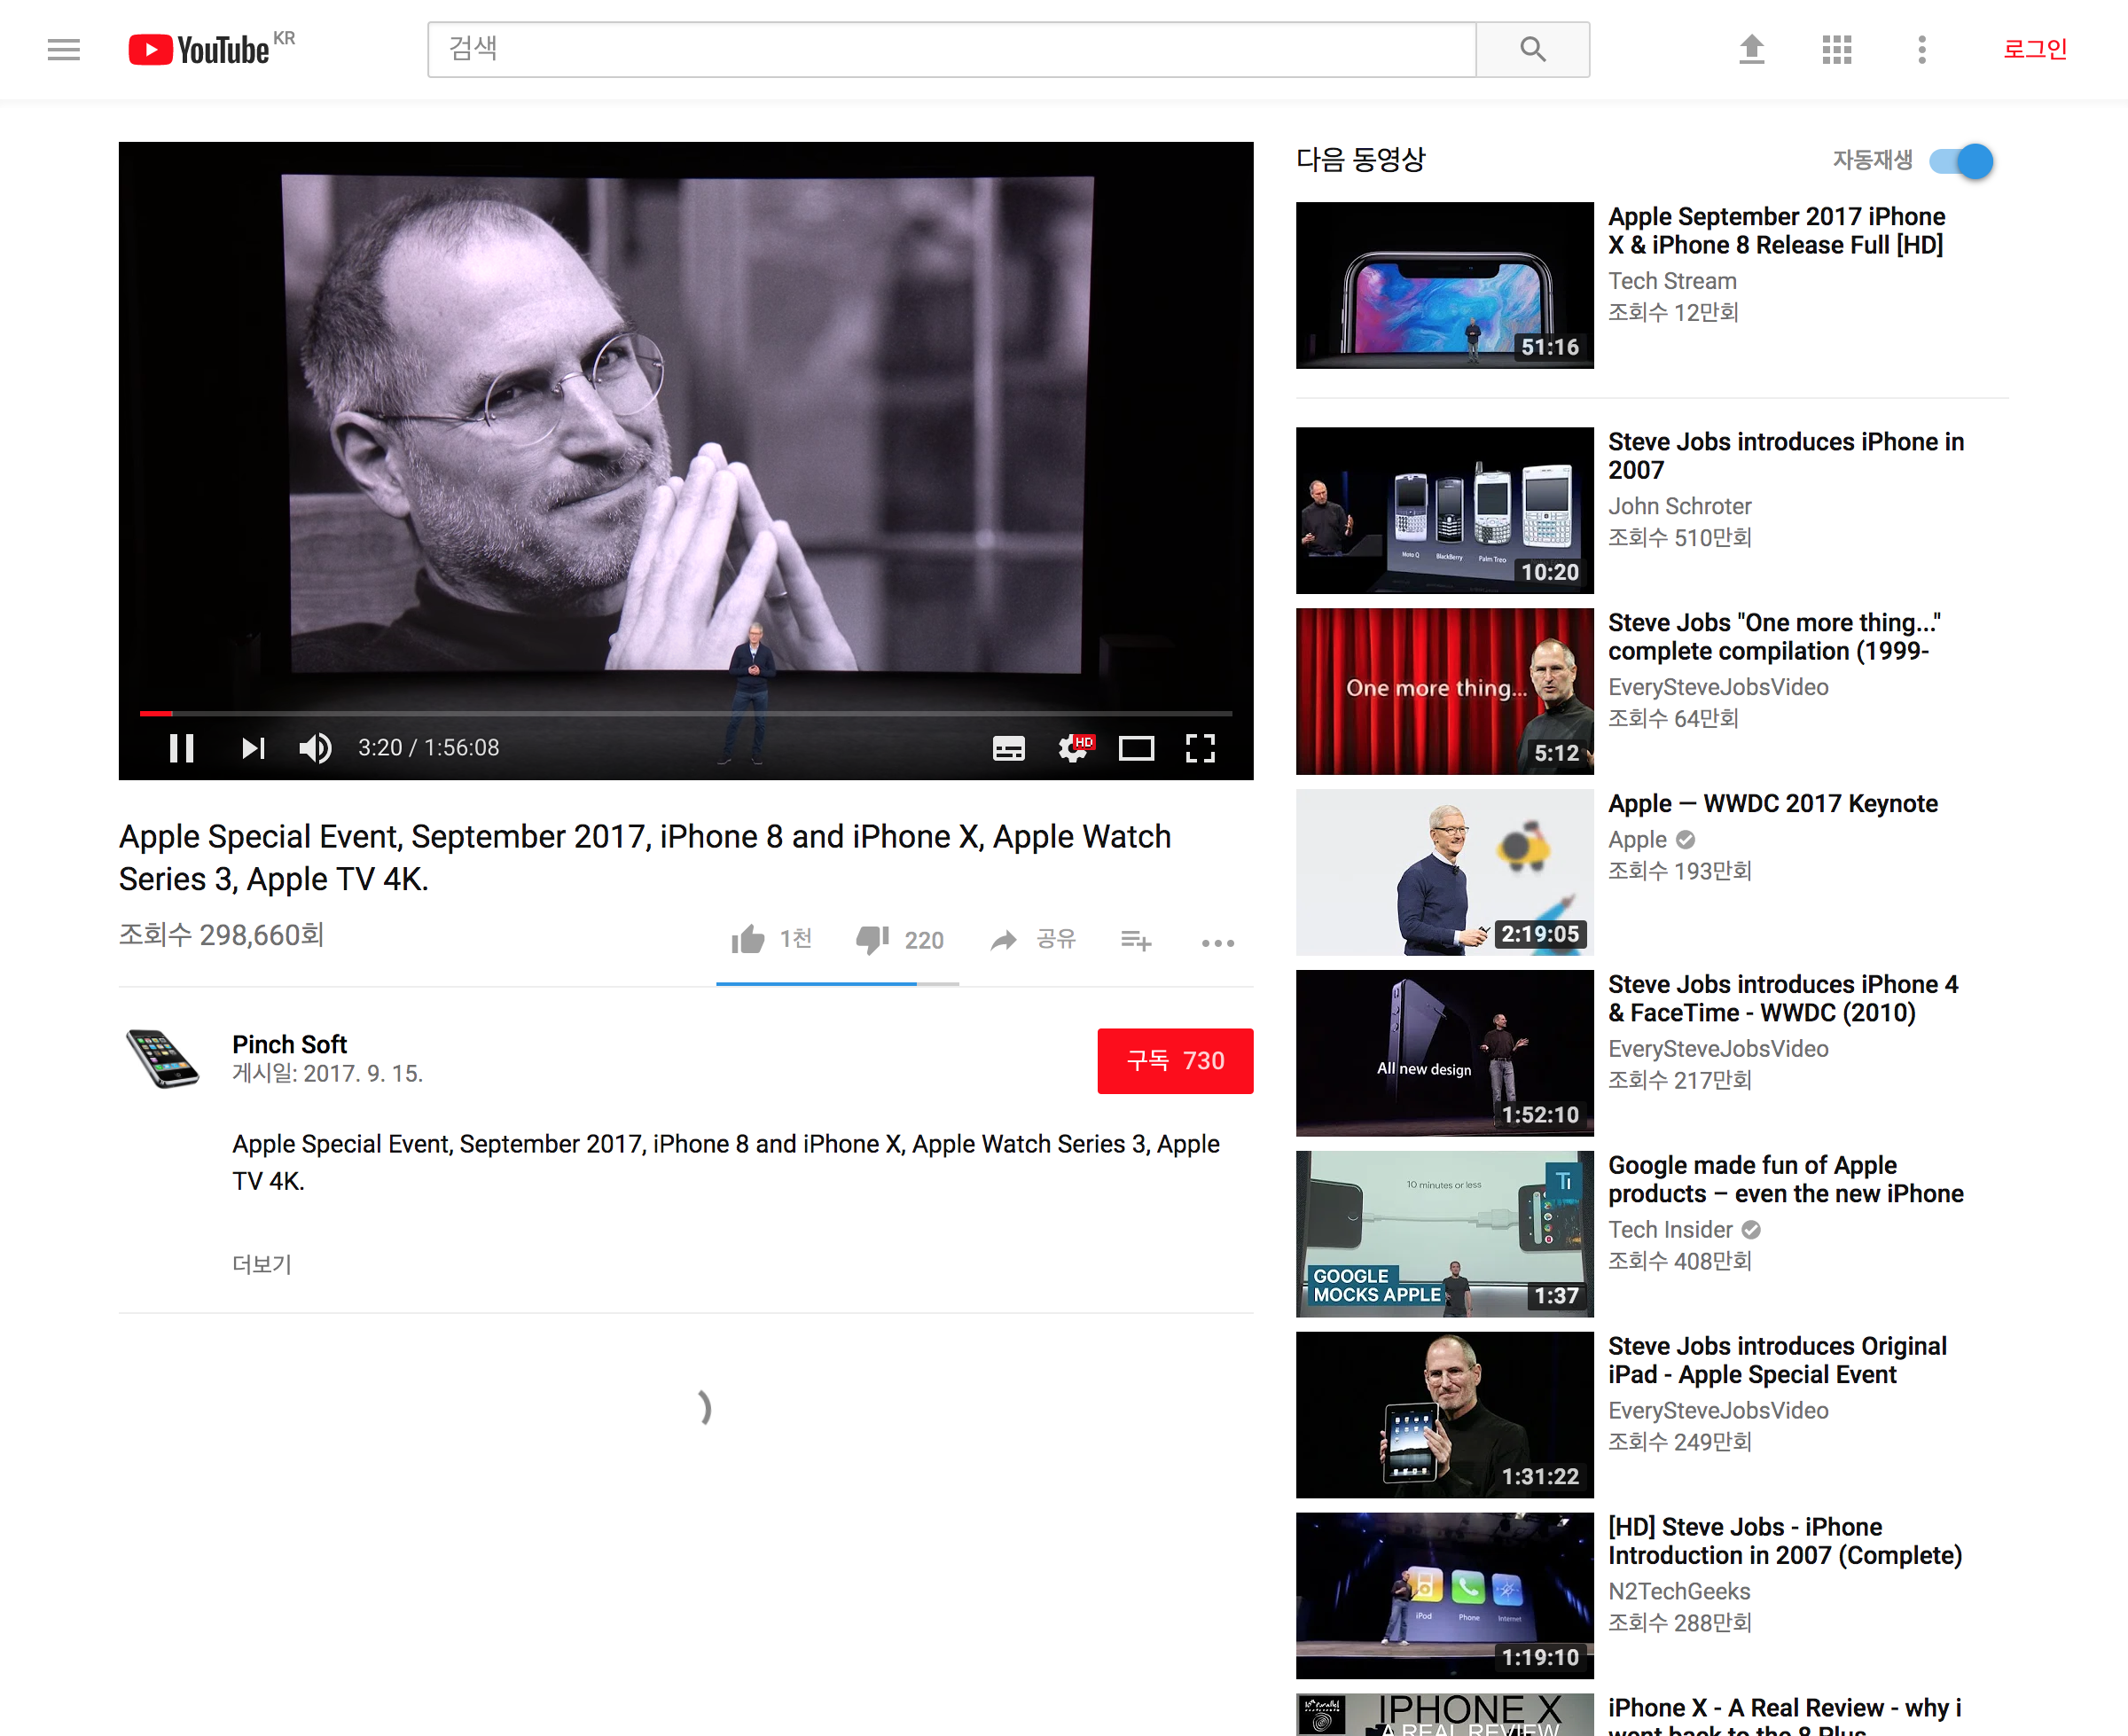

In [3]:
# 저장된 이미지파일의 사이즈와 이미지를 pillow를 이용하여 확인 합니다.
pil_im = pil.open('screenshot.png')
print(pil_im.size)
pil_im

##### change image size

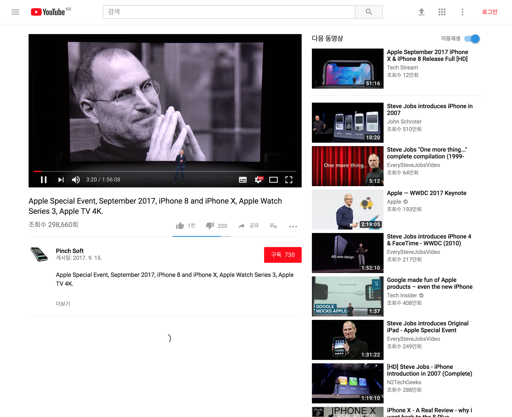

In [4]:
# pillow를 이용하여 512*512 사이즈로 이미지의 크기를 변환합니다.
pil_im.thumbnail((512, 512))
pil_im.save("screenshot_thumnail.png")
pil.open('screenshot_thumnail.png')

##### select element image
- 이미지의 특정 영역을 자를수 있습니다.
- 모니터의 해상도에 따라서 위치를 계산하는 방법에 차이가 있을수 있습니다.

In [5]:
# 특정 selector의 element의 위치와 사이즈 데이터를 확인합니다.
element = driver.find_element_by_css_selector('#movie_player')
location = element.location
size = element.size
location, size

({'x': 67, 'y': 80}, {'height': 360, 'width': 640})

In [6]:
# 저장했던 원본이미지를 열어 top, bottom, right, left의 위치를 계산합니다.
pil_im = pil.open('screenshot.png')
left = location['x'] * 2
top = location['y'] * 2
right = left + size['width'] * 2
bottom = top + size['height'] * 2
area = (left, top, right, bottom)
area

(134, 160, 1414, 880)

In [7]:
# pillow를 이용하여 계산된 위치로 이미지를 잘라줍니다.
pil_im = pil_im.crop(area) 

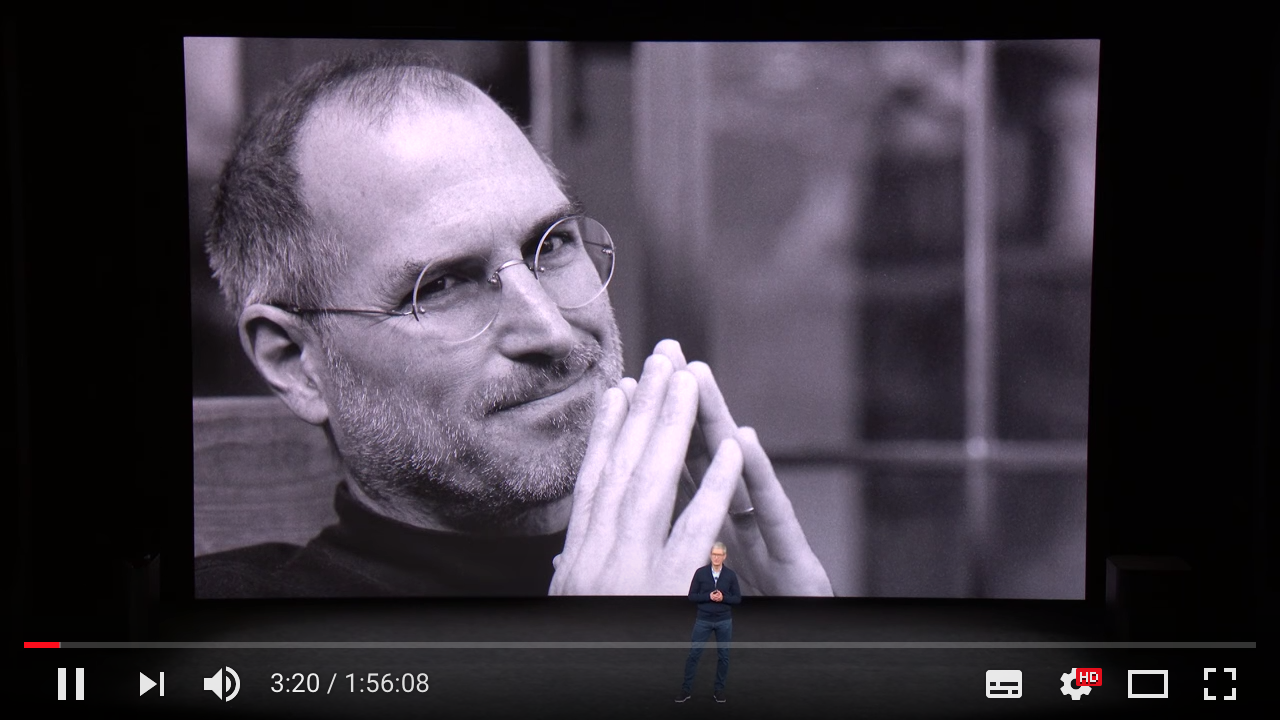

In [8]:
# 자른 이미지를 저장하고 저장된 이미지를 보여줍니다.
pil_im.save("screenshot_element.png")
pil.open('screenshot_element.png')

In [9]:
# 브라우져 닫기
driver.close()